Загрузка нужных библиотек:

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

Генерация данных для решения задачи классификации:

In [15]:
X, y = make_classification(n_samples=1024, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True)

Визуализация данных:

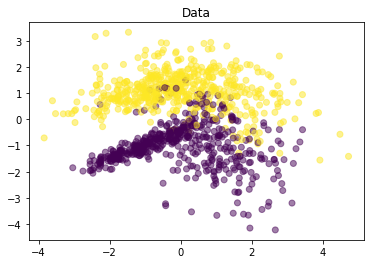

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.title('Data')
plt.show()

In [17]:
y = np.expand_dims(y, 1)
y.shape

(1024, 1)

Двухслойный перцептрон:

In [24]:
learning_rate = 0.2
epochs = 100

# Инициализация весов
W1 = np.random.randn(X.shape[1], 100) * 0.01 # 2 - количество фичей у входных данных
b1 = np.zeros(1)
W2 = np.random.randn(100, y.shape[1])*0.01 # 1 - количество фичей, которые предсказываем, 100 – размер скрытого слоя
b2 = np.zeros(1)


losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')

    # Первое линейное преобразование, которое поступает на вход скрытому слою
    Z1 = np.dot(X, W1) + b1
    # Функция активации в скрытом слое
    # Я выбрала функцию tanh
    A1 = (np.exp(Z1) - np.exp(-Z1)) / (np.exp(Z1) + np.exp(-Z1))
    # Второе линейное преобразование, которое поступает на вход последнему слою
    Z2 = np.dot(A1, W2) + b2
    # Функция активации в последнем слое
    # Сигмоида, поскольку у нас задача бинарной классификации
    A2 = 1 / (1 + np.exp(-Z2))
    
    # Функция потерь; бинарная кросс-энтропия
    BCE = -(np.sum(np.multiply(np.log(A2), y) + np.multiply((1 - y), np.log(1 - A2)))) / X.shape[0]
    
    # Сохранение результатов функции потерь
    losses.append(BCE)
    
    # Подсчёт градиента для W2
    dZ2_W2 = A1
    dA2_Z2 = A2 * (1 - A2)  # производная сигмоиды
    dBCE_A2 = (((1 - y) / (1 - A2)) - y / A2) / X.shape[0]
    dBCE_W2 = dZ2_W2.T.dot(dA2_Z2 * dBCE_A2)
    
    # Подсчёт градиента для b2
    dBCE_b2 = np.sum(dA2_Z2 * dBCE_A2)
    
    # Подсчёт градиента для W1
    dZ1_W1 = X
    dA1_Z1 = 1 - A1**2  # производная tanh
    dZ2_A1 = W2.T
    dBCE_Z2 = dA2_Z2 * dBCE_A2
    dBCE_A1 = np.dot(dBCE_Z2, dZ2_A1) * dA1_Z1
    dBCE_W1 = dZ1_W1.T.dot(np.multiply(dA1_Z1, dBCE_A1))
    
    # Подсчёт градиента для b1
    dBCE_b1 = np.sum(dA1_Z1 * dBCE_A1)
    
    # Обновление весов
    W2 -= learning_rate * dBCE_W2
    b2 -= learning_rate * dBCE_b2
    W1 -= learning_rate * dBCE_W1
    b1 -= learning_rate * dBCE_b1


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100


Визуализация значений функции ошибки:

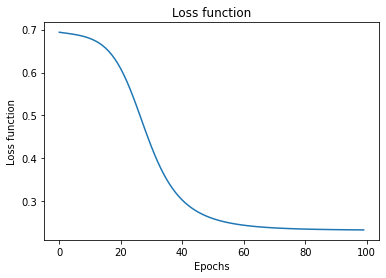

In [25]:
plt.plot(losses)
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.show()